In [1]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
import os
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.23.2
Numpy version=1.18.5
Pandas version=1.1.0
Seaborn version=0.10.1
Python version=3.7.4


In [54]:
#Import train data 
os.chdir('C:/Users/julia/Documents/GitHub/CAIIC')

df_train = pd.read_csv("Competition train set.csv")
df_train.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
0,1,MPB_331,400,2015/5/11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,...,28.96,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0
1,2,MPB_331,400,2015/5/12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,...,32.97,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0
2,3,MPB_331,400,2015/5/14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,...,36.31,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0
3,4,MPB_331,400,2015/5/16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,...,32.40,30.98,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0
4,5,MPB_331,400,2015/5/18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,...,36.62,33.39,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0


# Exploratory Data Analysis

In [55]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
df_train.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354288 entries, 0 to 354287
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          354288 non-null  int64  
 1   DTNumber    354288 non-null  object 
 2   Volume      354288 non-null  int64  
 3   DDate       354288 non-null  object 
 4   DType       354288 non-null  object 
 5   MaxTemp     352977 non-null  float64
 6   MinTemp     352977 non-null  float64
 7   UserNumber  354288 non-null  object 
 8   UserName    354288 non-null  object 
 9   Terminal    354288 non-null  int64  
 10  EMANumber   354288 non-null  object 
 11  CT          354288 non-null  int64  
 12  PT          354288 non-null  int64  
 13  A0          354288 non-null  float64
 14  A1          354288 non-null  float64
 15  A2          354288 non-null  float64
 16  A3          354288 non-null  

,ID,Volume,MaxTemp,MinTemp,Terminal,CT,PT,A0,A1,A2,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
count,354288.000000,354288.000000,352977.000000,352977.000000,3.542880e+05,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,...,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000
mean,177144.500000,718.072924,19.666170,10.202467,1.042997e+06,250.975195,0.999845,47.770457,40.930033,37.616748,...,53.157830,54.142749,59.539603,70.983996,77.977475,80.380269,80.842326,75.017536,60.747170,0.004076
std,102274.280423,434.955885,11.099402,10.651110,4.846216e+05,162.931418,0.012459,45.722346,40.480694,37.969536,...,50.649057,50.951669,55.118614,64.820125,69.564879,70.343406,70.473062,66.423279,55.586811,0.063712
min,1.000000,50.000000,-7.300000,-14.500000,1.300110e+05,0.000000,0.000000,-189.090000,-243.360000,-248.400000,...,-239.160000,-231.720000,-239.640000,-235.230000,-231.960000,-248.310000,-234.510000,-240.000000,-250.980000,0.000000
25%,88572.750000,315.000000,9.700000,-0.300000,1.300112e+06,100.000000,1.000000,17.217500,14.740000,13.460000,...,19.240000,19.660000,21.570000,25.900000,28.000000,28.960000,28.870000,26.760000,21.960000,0.000000
50%,177144.500000,630.000000,21.700000,11.500000,1.300212e+06,200.000000,1.000000,37.680000,31.640000,28.680000,...,41.820000,43.050000,47.760000,57.640000,64.590000,67.880000,68.680000,62.690000,49.410000,0.000000
75%,265716.250000,1250.000000,29.500000,20.000000,1.300302e+06,400.000000,1.000000,64.440000,54.300000,49.420000,...,71.680000,73.350000,81.720000,98.040000,108.600000,112.332500,113.520000,105.112500,83.760000,0.000000
max,354288.000000,2000.000000,39.500000,27.700000,1.300396e+06,800.000000,1.000000,696.640000,589.040000,543.720000,...,692.080000,631.640000,704.520000,780.880000,894.320000,910.600000,960.000000,1003.800000,847.800000,1.000000


In [5]:
#List out the missing values 

df_train.isnull().sum()

ID               0
DTNumber         0
Volume           0
DDate            0
DType            0
MaxTemp       1311
MinTemp       1311
UserNumber       0
UserName         0
Terminal         0
EMANumber        0
CT               0
PT               0
A0               0
A1               0
A2               0
A3               0
A4               0
A5               0
A6               0
A7               0
A8               0
A9               0
A10              0
A11              0
A12              0
A13              0
A14              0
A15              0
A16              0
A17              0
A18              0
A19              0
A20              0
A21              0
A22              0
A23              0
Is_gz            0
dtype: int64

In [56]:
# Number of records where Is_gz = 1 or 0
overloaded=len(df_train[df_train['Is_gz']==1])
normal=len(df_train[df_train['Is_gz']==0])

print('Overloaded:', overloaded, '\nNormal:', normal)
print(str(round(overloaded/normal*100, 2)) + '% of the transformers are overloaded')

# Because of the small number of overloaded transformers, the dataset is highly imbalanced

Overloaded: 1444 
Normal: 352844
0.41% of the transformers are overloaded


In [7]:
#drop ID column (unwanted column)
df_train=df_train.drop(['ID'],axis=1)

<AxesSubplot:>

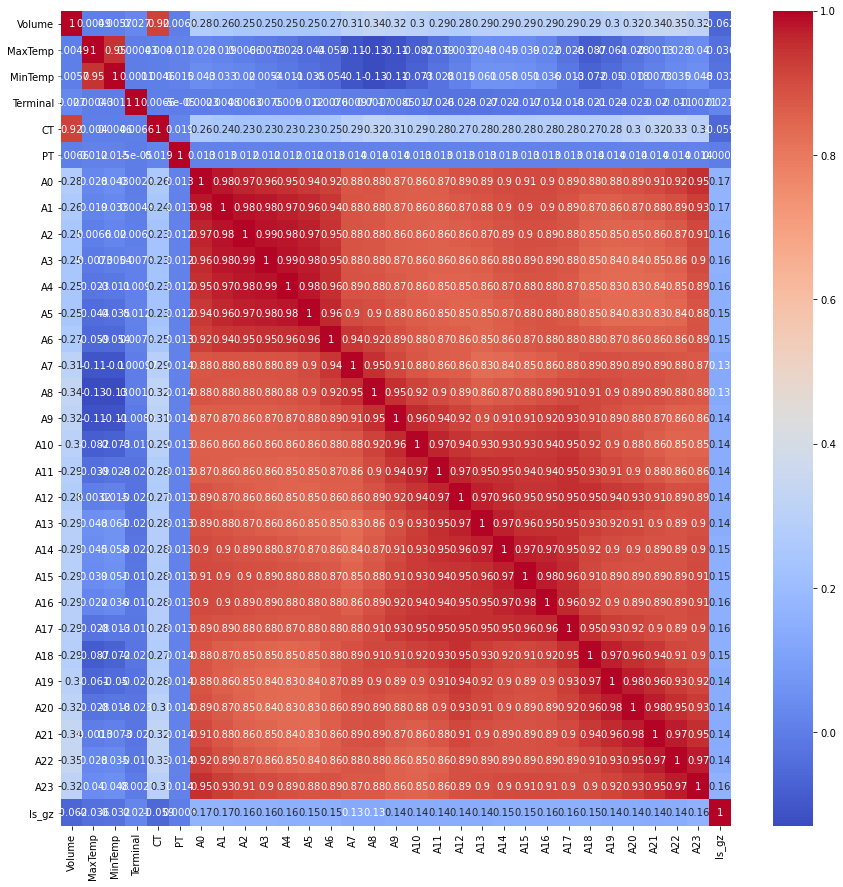

In [8]:
#heatmap (correlation analysis) -overview 
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [9]:
# Seperated the columns into catergorical variables and numerical variables

num_vars=list(df_train.columns[df_train.dtypes != "object"])
cat_vars=list(df_train.columns[df_train.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  ['DTNumber', 'DDate', 'DType', 'UserNumber', 'UserName', 'EMANumber']
Numerical Variables:  ['Volume', 'MaxTemp', 'MinTemp', 'Terminal', 'CT', 'PT', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'Is_gz']


Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

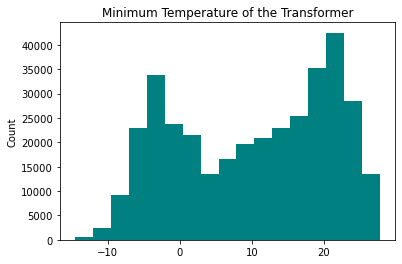

In [10]:
#Show the Minimum Temperature of the Transformer

plt.hist(df_train['MinTemp'], bins=17,color='teal')
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

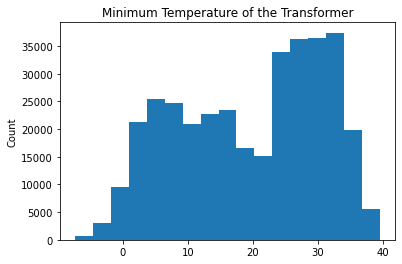

In [11]:
#Show the Maximum Temperature of the Transformer

plt.hist(df_train['MaxTemp'], bins=17)
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

In [12]:
#convert DDate into Datetime function 
df_train['DDate'] =pd.to_datetime(df_train.DDate, format='%Y/%m/%d')

#extract day of week 
df_train['dayofWeek'] = df_train['DDate'].dt.dayofweek
df_train['dayofWeek'].head()

# 0 = Monday 

0    0
1    1
2    3
3    5
4    0
Name: dayofWeek, dtype: int64

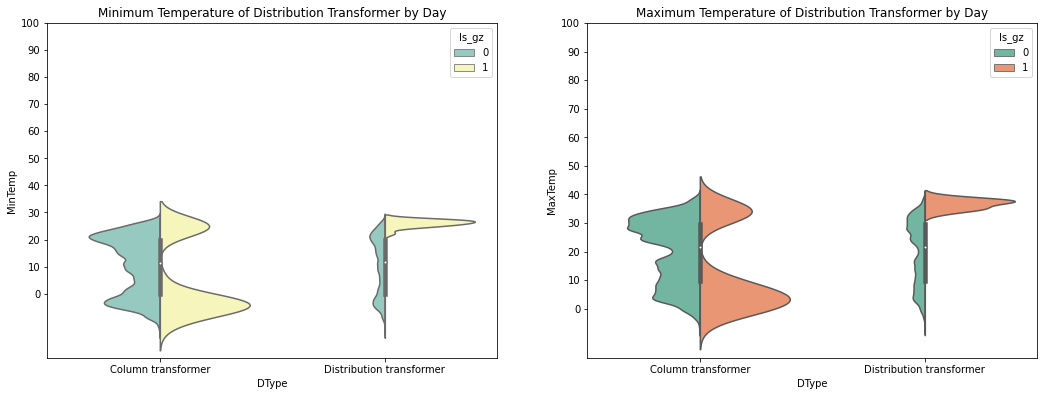

In [13]:
# #Average Age for Respective Sex 
# sns.boxplot(y='MaxTemp',x='dayofWeek',data=df_train)
# plt.title('Minimum Temperature of Distribution Transformer by Day')

#Temperature of Distribution Transformer by Day -- Column and Distrubution 
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.violinplot('DType','MinTemp',hue='Is_gz',data=df_train,split=True,ax=ax[0], palette="Set3")
ax[0].set_title('Minimum Temperature of Distribution Transformer by Day')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('DType','MaxTemp', hue='Is_gz', data=df_train,split=True,ax=ax[1],palette="Set2")
ax[1].set_title('Maximum Temperature of Distribution Transformer by Day')
ax[1].set_yticks(range(0,110,10))

plt.subplots_adjust(right=1.5, top=0.9)
plt.show()

DType                     Volume
Column transformer        50         5407
                          100        1102
                          160        1092
                          200        4626
                          250        9321
                          315       59959
                          400       62343
Distribution transformer  250        5503
                          315       10513
                          400        2948
                          500       10807
                          630       32899
                          800       19727
                          1000      33095
                          1250      77044
                          1600      15531
                          2000       2371
Name: Is_gz, dtype: int64


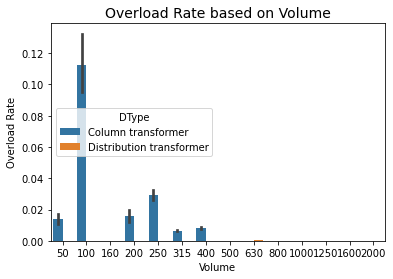

In [14]:
#show the total number of passengers in each ageGroup groupby survival rate 
print(df_train.groupby(['DType', 'Volume'])['Is_gz'].count())

#barplot showing survival rate based on Age Group
sns.barplot(x='Volume',y='Is_gz',hue='DType',data=df_train)
plt.title("Overload Rate based on Volume",fontsize=14)
plt.xlabel("Volume")
plt.ylabel("Overload Rate")

plt.show()

In [15]:
# loading_value = df_train['A0', 'A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
#                         'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18','A19','A20',
#                         'A21','A22','A23']
# plt.plot('Volume',['A0', 'A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'
#                         'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18','A19','A20',
#                         'A21','A22','A23'], data = df_train, figsize=(15,15))


DType                     Is_gz
Column transformer        0        142423
                          1          1427
Distribution transformer  0        210421
                          1            17
Name: Is_gz, dtype: int64


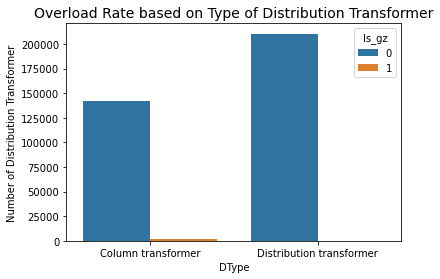

In [16]:
#gender - survival (Find out which gender has a higher survival rate)

print(df_train.groupby(['DType', 'Is_gz'])['Is_gz'].count())

sns.countplot('DType',hue='Is_gz',data=df_train)
plt.title("Overload Rate based on Type of Distribution Transformer",fontsize=14)
plt.xlabel("DType")
plt.ylabel("Number of Distribution Transformer")
plt.show()

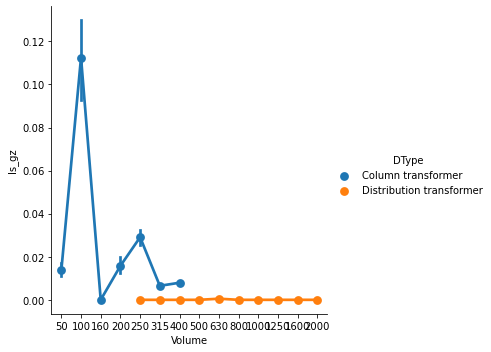

In [17]:
sns.factorplot('Volume','Is_gz','DType', data=df_train)

<AxesSubplot:xlabel='Is_gz', ylabel='A3'>

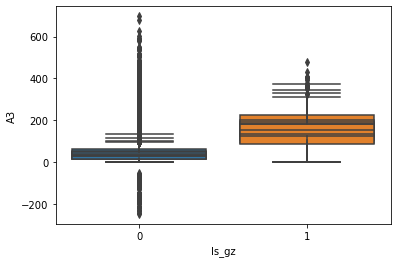

In [18]:
# fig, ax = plt.subplots()

sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A1'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A2'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A3'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# ax.boxplot(x=df_train['Is_gz'], y=df_train['A1'], data = df_train)

# Data Preperation

### Handle missing values 

#### MinTemp & MaxTemp

In [19]:
# Min and max temperature (null values)
#remove the rows/// replace with mean? 

df_train = df_train.dropna()
df_train.head()

,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,EMANumber,...,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz,dayofWeek
0,MPB_331,400,2015-05-11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,Num_40129,...,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0,0
1,MPB_331,400,2015-05-12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,Num_40129,...,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0,1
2,MPB_331,400,2015-05-14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,Num_40129,...,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0,3
3,MPB_331,400,2015-05-16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,Num_40129,...,30.98,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0,5
4,MPB_331,400,2015-05-18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,Num_40129,...,33.39,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0,0


In [20]:
#checking purpose (make sure there's no more null values)

#check if all null values are being replaced 
print("Missing Values: \n", df_train.isnull().sum())

Missing Values: 
 DTNumber      0
Volume        0
DDate         0
DType         0
MaxTemp       0
MinTemp       0
UserNumber    0
UserName      0
Terminal      0
EMANumber     0
CT            0
PT            0
A0            0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
A15           0
A16           0
A17           0
A18           0
A19           0
A20           0
A21           0
A22           0
A23           0
Is_gz         0
dayofWeek     0
dtype: int64


### Melting columns A0-A23

In [23]:
# melt column A0-A23 (for further exploration purpose on loading values)

df_train2 =df_train.melt(id_vars = ['DTNumber', 'Volume', 'DDate','DType','MaxTemp', 'MinTemp',
                             'UserNumber','UserName','Terminal','EMANumber','CT','PT','Is_gz'],
                  var_name = 'operating_point', value_name = 'loading_value')

df_train2.head()

,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,EMANumber,CT,PT,Is_gz,operating_point,loading_value
0,MPB_331,400,2015-05-11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,25.75
1,MPB_331,400,2015-05-12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,24.23
2,MPB_331,400,2015-05-14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.42
3,MPB_331,400,2015-05-16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.54
4,MPB_331,400,2015-05-18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,35.43


Text(0.5, 1.0, 'Overload Rate Based on Loading Values')

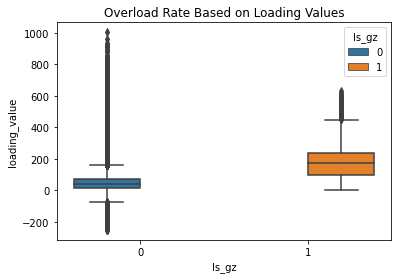

In [24]:
sns.boxplot(x=df_train2['Is_gz'], y=df_train2['loading_value'], hue = 'Is_gz',data = df_train2)
plt.title('Overload Rate Based on Loading Values')

Text(0.5, 1.0, 'Loading Value and Overload Rate on Each Operation Point')

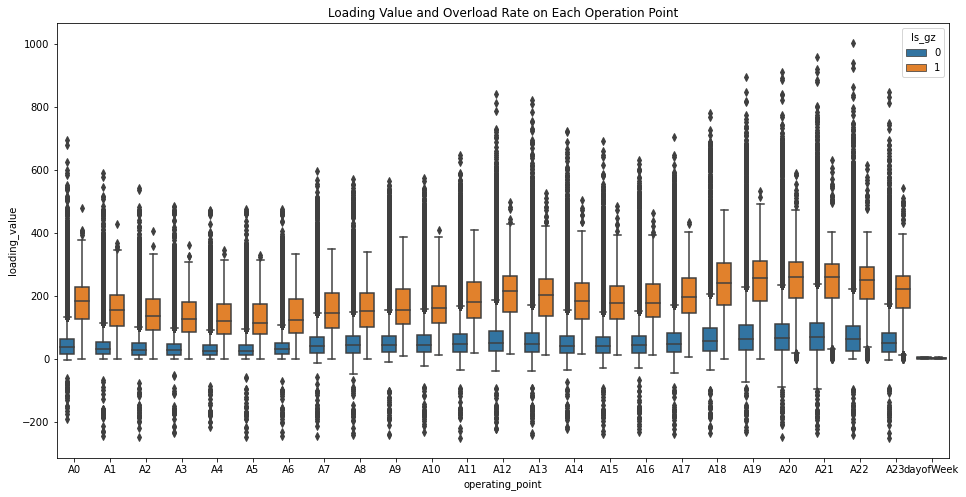

In [25]:
plt.figure(figsize =(16,8))
sns.boxplot(x=df_train2['operating_point'], y=df_train2['loading_value'], hue = 'Is_gz',data = df_train2)
plt.title('Loading Value and Overload Rate on Each Operation Point')

<Figure size 1152x576 with 0 Axes>

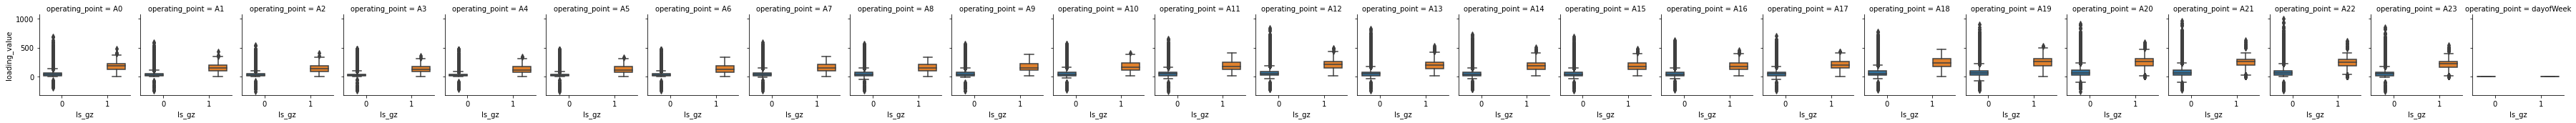

In [26]:
plt.figure(figsize =(16,8))
g = sns.catplot(x="Is_gz", y="loading_value",
                hue="Is_gz", col="operating_point",
                data=df_train2, kind="box",
                height=2.5, aspect=.8)

# Feature Engineering 

In [27]:
#convert DDate into Datetime function 
df_train2['DDate'] =pd.to_datetime(df_train2.DDate, format='%Y/%m/%d')

#extract day of week 
df_train2['dayofWeek'] = df_train2['DDate'].dt.dayofweek
df_train2['dayofWeek'].head()

# 0 = Monday 

0    0
1    1
2    3
3    5
4    0
Name: dayofWeek, dtype: int64

In [100]:
df_train2.head()

,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,EMANumber,CT,PT,Is_gz,operating_point,loading_value,dayofWeek
0,MPB_331,400,2015-05-11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,25.75,0
1,MPB_331,400,2015-05-12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,24.23,1
2,MPB_331,400,2015-05-14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.42,3
3,MPB_331,400,2015-05-16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.54,5
4,MPB_331,400,2015-05-18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,35.43,0


# Data Cleansing

In [118]:
#remove unwanted columns 
df_train3=df_train.drop(['ID','DTNumber','DDate','UserNumber','UserName','Terminal','EMANumber'],axis=1)
df_train3.head()

,Volume,DType,MaxTemp,MinTemp,CT,PT,A0,A1,A2,A3,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
0,400,Column transformer,21.6,8.0,100,1,25.75,21.13,12.37,17.70,...,28.96,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0
1,400,Column transformer,29.7,15.1,100,1,24.23,22.07,20.66,23.66,...,32.97,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0
2,400,Column transformer,27.2,18.4,100,1,28.42,24.59,21.98,23.68,...,36.31,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0
3,400,Column transformer,28.0,16.4,100,1,28.54,27.86,22.72,23.10,...,32.40,30.98,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0
4,400,Column transformer,32.7,22.5,100,1,35.43,29.98,26.95,26.81,...,36.62,33.39,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0


In [119]:
# Show categorical varibles and numeric variables

tnum_vars=list(df_train3.columns[df_train3.dtypes != "object"])
tcat_vars=list(df_train3.columns[df_train3.dtypes == "object"])
print("Categorical Variables: ",tcat_vars)
print("Numerical Variables: ",tnum_vars)

Categorical Variables:  ['DType']
Numerical Variables:  ['Volume', 'MaxTemp', 'MinTemp', 'CT', 'PT', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'Is_gz']


In [120]:
#encode all the categorical variables
nonnumfeats = tcat_vars
print(nonnumfeats)

#Convert Multiple Categorical Data Columns to Numerical Data Columns using Dummy Variables
df_train3 = pd.get_dummies(df_train3,columns=nonnumfeats)

df_train3.head()

['DType']


,Volume,MaxTemp,MinTemp,CT,PT,A0,A1,A2,A3,A4,...,A17,A18,A19,A20,A21,A22,A23,Is_gz,DType_Column transformer,DType_Distribution transformer
0,400,21.6,8.0,100,1,25.75,21.13,12.37,17.70,17.65,...,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0,1,0
1,400,29.7,15.1,100,1,24.23,22.07,20.66,23.66,21.72,...,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0,1,0
2,400,27.2,18.4,100,1,28.42,24.59,21.98,23.68,21.81,...,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0,1,0
3,400,28.0,16.4,100,1,28.54,27.86,22.72,23.10,22.50,...,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0,1,0
4,400,32.7,22.5,100,1,35.43,29.98,26.95,26.81,26.91,...,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0,1,0


# Train Model

## Split Data into Train and Test Sets

In [121]:
# grab random 4000 of the data from records where Is_gz = 0 to balance dataset
df_train_Is_gz=df_train3.query('Is_gz == 0').sample(n=4000)
df_train_Is_gz=pd.concat([df_train_Is_gz, df_train3[df_train3['Is_gz'] == 1]])
df_train_Is_gz

,Volume,MaxTemp,MinTemp,CT,PT,A0,A1,A2,A3,A4,...,A17,A18,A19,A20,A21,A22,A23,Is_gz,DType_Column transformer,DType_Distribution transformer
83254,1600,29.9,18.6,600,1,70.62,61.56,62.88,58.20,52.98,...,83.76,106.08,83.16,113.28,116.58,103.56,73.80,0,0,1
193866,1250,24.8,14.2,400,1,31.96,20.48,19.76,16.36,20.20,...,28.32,37.24,52.80,55.72,67.48,73.24,41.72,0,0,1
320236,315,1.3,-6.0,100,1,26.65,13.46,12.95,13.06,13.84,...,21.82,38.13,58.03,44.24,36.46,39.92,31.05,0,1,0
161428,315,30.4,8.7,100,1,46.99,34.89,36.81,32.81,30.49,...,82.73,111.38,95.62,92.83,97.40,78.86,61.30,0,1,0
254852,1250,13.1,1.6,400,1,36.88,30.56,29.20,28.44,28.96,...,39.52,47.08,66.36,60.68,47.64,51.20,34.24,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353836,315,-3.2,-8.7,100,1,206.52,201.67,198.97,195.31,195.72,...,207.09,237.16,247.16,253.22,248.22,240.08,230.98,1,1,0
353838,315,-3.0,-8.6,100,1,216.11,206.56,201.77,204.18,206.40,...,204.45,234.46,247.04,242.95,242.83,234.56,227.89,1,1,0
353841,315,0.6,-8.9,100,1,208.00,203.66,203.31,200.05,200.75,...,213.36,240.60,257.29,265.79,263.87,243.13,224.93,1,1,0
353842,315,3.6,-8.9,100,1,221.08,208.58,210.71,205.52,209.08,...,184.58,215.88,242.19,240.22,242.15,225.23,203.62,1,1,0


In [122]:
from sklearn.model_selection import train_test_split
y = df_train_Is_gz["Is_gz"].values
X = df_train_Is_gz.drop(["Is_gz"],axis=1).values


#split data into 80% traning set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=44)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

# Trained Model with Algorithm

## Train Model with Algorithm: Logistic Regression

In [124]:
lr_model = LogisticRegression()

#fit logistic regression model to the data 
lr_model.fit(X_train, y_train)

#make predictions 
Y_pred_LR = lr_model.predict(X_test)
print(lr_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_LR))
print(metrics.confusion_matrix(y_test, Y_pred_LR))

#accuracy score for both train set and test set
score_lr=round(accuracy_score(y_train, lr_model.predict(X_train))*100,2)
acc_lr=round(accuracy_score(y_test, Y_pred_LR)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_lr))
print("Accuracy score for the test set={:.2f}%".format(acc_lr))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Train Model with Algorithm: Random Forest 

In [ ]:
random_forest = RandomForestClassifier()

#fit random forest model to the data 
random_forest.fit(X_train, y_train)

#make predictions 
Y_pred_RF = random_forest.predict(X_test)
print(random_forest)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_rf=round(accuracy_score(y_train, random_forest.predict(X_train))*100,2)
acc_rf=round(accuracy_score(y_test, Y_pred_RF)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_rf))
print("Accuracy score for the test set={:.2f}%".format(acc_rf))

## Train Model with Algorithm: K Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 

#fit KNN model to the data 
knn_model.fit(X_train, y_train)  

#make predictions 
Y_pred_KNN = knn_model.predict(X_test)  
print(knn_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_knn=round(accuracy_score(y_train, knn_model.predict(X_train))*100,2)
acc_knn=round(accuracy_score(y_test, Y_pred_KNN)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_knn))
print("Accuracy score for the test set={:.2f}%".format(acc_knn))

## Train Model with Algorithm: Support Vector Classifier

In [ ]:
svc_model = LinearSVC()

#fit random forest model to the data 
svc_model.fit(X_train, y_train)

#prediction
Y_pred_SVC = svc_model.predict(X_test)
print(svc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_SVC))
print(metrics.confusion_matrix(y_test, Y_pred_SVC))

#accuracy score for test and train score
score_svc=round(accuracy_score(y_train, svc_model.predict(X_train))*100,2)
acc_svc=round(accuracy_score(y_test, Y_pred_SVC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_svc))
print("Accuracy score for the test set={:.2f}%".format(acc_svc))

## Train Model with Algorithm: Gradient Boosting Classifier

In [ ]:
gbc_model= GradientBoostingClassifier()

#fit random forest model to the data 
gbc_model.fit(X_train, y_train)

Y_pred_GBC = gbc_model.predict(X_test)
print(gbc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_GBC))
print(metrics.confusion_matrix(y_test, Y_pred_GBC))

#accuracy score
score_gbc=round(accuracy_score(y_train, gbc_model.predict(X_train))*100,2)
acc_gbc=round(accuracy_score(y_test, Y_pred_GBC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_gbc))
print("Accuracy score for the test set={:.2f}%".format(acc_gbc))

## Overview of all Trainned Models

In [ ]:
#list out all the trained models and put them into a dataframe
models = pd.DataFrame({
    'Trainned Model': ['Logistic Regression','Random Forest','K Nearest Neighbor',
                       'Support Vector Classifier','Gradient Boosting Classifier'],
    'Score': [acc_lr, acc_rf, acc_knn, 
              acc_svc, acc_gbc]})
models_df = models.sort_values(by='Score', ascending=False)
models_df = models_df.set_index('Score')
models_df